In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns


In [5]:
df = pd.read_csv("Country-data.csv")

In [6]:
numeric_df = df.drop(columns=["country"])

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

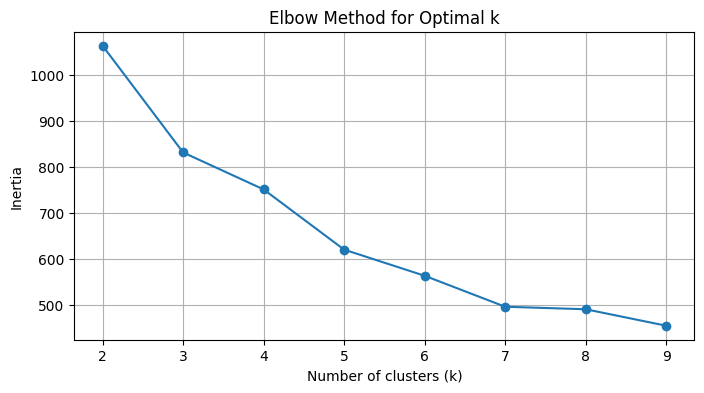


Cluster assigned to each country:

               country  cluster
0          Afghanistan        2
1              Albania        0
2              Algeria        0
3               Angola        2
4  Antigua and Barbuda        0


In [ ]:
# 3. Elbow Method (find optimal K)
# -------------------------
inertia_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia_scores, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()



In [10]:

# 4. Train K-Means (choose k = 3 or 4)
# -------------------------
k = 4   # you can change this based on the elbow curve
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_data)

print("\nCluster assigned to each country:\n")
print(df[["country", "cluster"]].head())


Cluster assigned to each country:

               country  cluster
0          Afghanistan        2
1              Albania        0
2              Algeria        0
3               Angola        2
4  Antigua and Barbuda        0


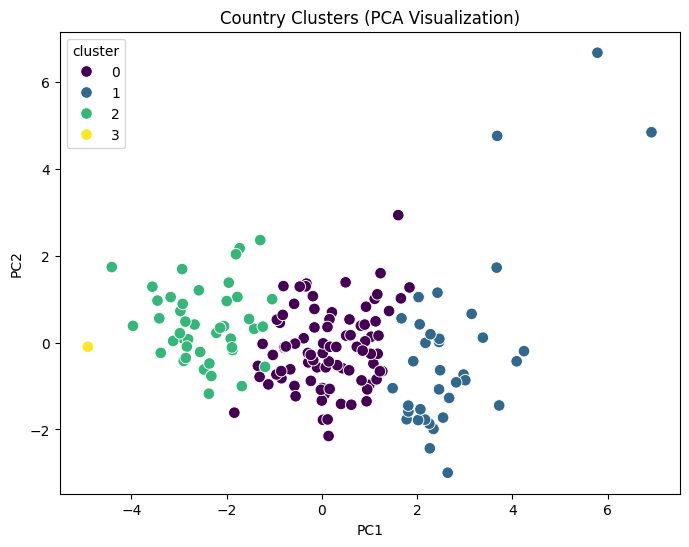

In [11]:
# 5. PCA for Visualization
# -------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df["PC1"] = pca_data[:, 0]
df["PC2"] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="cluster", palette="viridis", s=70)
plt.title("Country Clusters (PCA Visualization)")
plt.show()

In [12]:
# 6. Cluster Summary
# -------------------------
print("\nCluster Summary:")
cluster_summary = df.groupby("cluster")[numeric_df.columns].mean()
print(cluster_summary)

# Show countries in each cluster
print("\nCountries per Cluster:")
for c in df["cluster"].unique():
    print(f"\nCluster {c}:")
    print(df[df["cluster"] == c]["country"].values)


Cluster Summary:
         child_mort    exports    health    imports        income   inflation  \
cluster                                                                         
0         22.456977  40.273128  6.251047  47.362394  12321.744186    7.720884   
1          5.000000  58.738889  8.807778  51.491667  45672.222222    2.671250   
2         94.313636  28.677500  6.329091  42.872727   3503.250000    9.895568   
3        130.000000  25.300000  5.070000  17.400000   5150.000000  104.000000   

         life_expec  total_fer          gdpp  
cluster                                       
0         72.566279   2.340349   6461.767442  
1         80.127778   1.752778  42494.444444  
2         59.022727   5.047727   1753.909091  
3         60.500000   5.840000   2330.000000  

Countries per Cluster:

Cluster 2:
['Afghanistan' 'Angola' 'Benin' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Gu